# Introduction

In [ ]:
!pip install tensorflow

In [ ]:
!pip install visualkeras

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 993.7/993.7 kB 9.6 MB/s eta 0:00:00


In [ ]:
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import confusion_matrix, roc_curve, roc_auc_score
import seaborn as sns

In [ ]:
#importing necessary packages
import os
import tensorflow as tf
import numpy as np
import cv2
from tensorflow import keras
import matplotlib.pyplot as plt
import shutil
import hashlib
from hashlib import md5
import imageio.v2 as imageio
from imageio import imread
import pandas as pd
from keras.utils import img_to_array, array_to_img
from keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from keras.layers import GlobalAveragePooling2D, GlobalMaxPooling2D, Reshape, Dense, multiply, Permute, Concatenate, Conv2D, Add, Activation, Lambda
from keras import backend as K
from keras.activations import sigmoid

In [ ]:
from tensorflow.keras.applications import EfficientNetB0

In [ ]:
from tensorflow.keras.layers import Dense, Flatten, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam, SGD

In [ ]:
from tensorflow.keras.applications.vgg16 import preprocess_input
from tensorflow.keras.preprocessing import image as keras_image

In [ ]:
from sklearn.metrics import classification_report, accuracy_score
from keras.applications.vgg16 import VGG16
from tensorflow.keras.applications import InceptionV3
from tensorflow.keras.applications import ResNet50
import visualkeras

In [ ]:
#setting gpu memory consumption growth
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus:
  tf.config.experimental.set_memory_growth(gpu, True)

In [ ]:
#downloading kaggle.json file
!gdown "https://drive.google.com/uc?id=1qvWYHQC59BjrAoXZqW-x1ReWCf8owjZQ"

Downloading...
From: https://drive.google.com/uc?id=1qvWYHQC59BjrAoXZqW-x1ReWCf8owjZQ
To: /content/tumor.zip
100% 55.1M/55.1M [00:02<00:00, 24.8MB/s]


In [ ]:
#unzipping
!unzip tumor.zip

Archive:  tumor.zip
   creating: tumor/
   creating: tumor/pituitary_tumor/
  inflating: tumor/pituitary_tumor/image(1).jpg  
  inflating: tumor/pituitary_tumor/image(10).jpg  
  inflating: tumor/pituitary_tumor/image(11).jpg  
  inflating: tumor/pituitary_tumor/image(13).jpg  
  inflating: tumor/pituitary_tumor/image(15).jpg  
  inflating: tumor/pituitary_tumor/image(18).jpg  
  inflating: tumor/pituitary_tumor/image(19).jpg  
  inflating: tumor/pituitary_tumor/image(2).jpg  
  inflating: tumor/pituitary_tumor/image(20).jpg  
  inflating: tumor/pituitary_tumor/image(21).jpg  
  inflating: tumor/pituitary_tumor/image(22).jpg  
  inflating: tumor/pituitary_tumor/image(23).jpg  
  inflating: tumor/pituitary_tumor/image(27).jpg  
  inflating: tumor/pituitary_tumor/image(28).jpg  
  inflating: tumor/pituitary_tumor/image(3).jpg  
  inflating: tumor/pituitary_tumor/image(30).jpg  
  inflating: tumor/pituitary_tumor/image(31).jpg  
  inflating: tumor/pituitary_tumor/image(34).jpg  
  inflati

# Pre-processing

Here, we resize the images and save the as numpy arrays.

In [ ]:
path = "/content/tumor/glioma_tumor/gg (11).jpg"
image = cv2.imread(path)
image = cv2.resize(image, (224, 224))

gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

fltr_img = cv2.GaussianBlur(gray, (1,1), 0)

clahe = cv2.createCLAHE(clipLimit=2.5, tileGridSize=(8,8))
enh_img = clahe.apply(fltr_img)

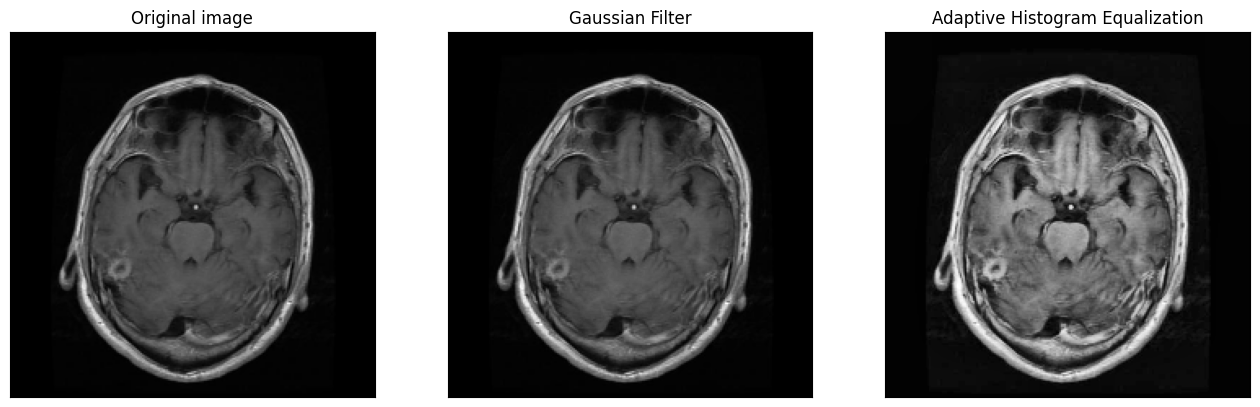

In [ ]:
plt.figure(figsize=(16,8))
plt.subplot(131)
plt.imshow(image, cmap="gray")
plt.xticks([])
plt.yticks([])
plt.title('Original image')
plt.subplot(132)
plt.imshow(fltr_img, cmap="gray")
plt.xticks([])
plt.yticks([])
plt.title('Gaussian Filter')
plt.subplot(133)
plt.imshow(enh_img, cmap="gray")
plt.xticks([])
plt.yticks([])
plt.title('Adaptive Histogram Equalization')

plt.show()

In [ ]:
def preprocessing(dir_name):

  labels = {}
  preprocessed_labels = []
  preprocessed_image = []
  i = 0

  for image_class in os.listdir(dir_name):
    labels[i] = image_class
    for img in os.listdir(os.path.join(dir_name, image_class)):
      path = os.path.join(dir_name, image_class, img)

      image = cv2.imread(path)
      image = cv2.resize(image, (224, 224))

      gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

      fltr_img = cv2.GaussianBlur(gray, (1,1), 0)

      clahe = cv2.createCLAHE(clipLimit=2.5, tileGridSize=(8,8))
      enh_img = clahe.apply(fltr_img)

      preprocessed_image.append(enh_img)
      preprocessed_labels.append(i)

    i+=1

  preprocessed_image = np.array(preprocessed_image)
  preprocessed_labels = np.array(preprocessed_labels)
  print("Preprocessing is complete!")
  return preprocessed_image, preprocessed_labels, labels

In [ ]:
data_dir = "/content/tumor"

In [ ]:
#applying the preprocessing function on our data directory and then saving them
X, Y, labels = preprocessing(data_dir)

Preprocessing is complete!


In [ ]:
labels

{0: 'pituitary_tumor', 1: 'glioma_tumor'}

# Train-Test Split

We've split the data into a ratio of 80:10:10 for training and testing respectively. Separate folders for train and test are created and images are divided following the above mentioned ratio.

In [ ]:
#splitting our preprocessed images in 80:20 for training and testing respectively
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.1, random_state=42)

In [ ]:
#splitting our preprocessed images in 80:20 for training and testing respectively
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.1, random_state=42)

In [ ]:
%mkdir train test val train/pituitary_tumor train/glioma_tumor test/pituitary_tumor test/glioma_tumor val/pituitary_tumor val/glioma_tumor

In [ ]:
train_dir = "/content/train"
test_dir = "/content/test"
val_dir = "./val"

In [ ]:
#function to save images to directory

def save_images(x_set, y_set, dir):
  i = 0
  for (img, imgclass) in zip(x_set, y_set):
    if imgclass == 0:
      cv2.imwrite(os.path.join(dir, 'pituitary_tumor', str(i) + '.jpg' ), img)
    else:
      cv2.imwrite(os.path.join(dir, 'glioma_tumor', str(i) + '.jpg'), img)
    i+=1
  print("Images successfully saved!")

In [ ]:
save_images(x_train, y_train, train_dir)
save_images(x_test, y_test, test_dir)
save_images(x_val, y_val, val_dir)

Images successfully saved!
Images successfully saved!
Images successfully saved!


# Data Augmentation

Data Augmentation helps us to diversify the data we feed the training model. We've used the ImageDataGenerator class from Keras for our training directory and applied the following augmentations to our training data such as rotation, flipping, width shift etc.

In [ ]:
#listing the augmentations to be applied to training images using ImageDataGenerator
train_datagen = ImageDataGenerator(
    rotation_range=10,
    width_shift_range=0.1,
    height_shift_range=0.1,
    rescale = 1./255,
    fill_mode="constant",
    brightness_range=[0.3, 0.2],
    horizontal_flip=True,
)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    color_mode='rgb',
    target_size=(224, 224),
    batch_size=32,
    class_mode='binary',
    shuffle =True,
    seed=42,
)

Found 1458 images belonging to 2 classes.


In [ ]:
#listing the augmentations to be applied to training images using ImageDataGenerator
val_datagen = ImageDataGenerator(
    rescale = 1./255,
)

val_generator = train_datagen.flow_from_directory(
    val_dir,
    color_mode='rgb',
    target_size=(224, 224),
    batch_size=32,
    class_mode='binary',
    shuffle =True,
    seed=42,
)

Found 162 images belonging to 2 classes.


In [ ]:
#using ImageDataGenerator class for test images (only rescaling)
test_datagen = ImageDataGenerator(
    rescale=1./255
)

test_generator = train_datagen.flow_from_directory(
    test_dir,
    color_mode='rgb',
    target_size=(224, 224),
    batch_size=1,
    class_mode=None,
    shuffle =False,
    seed=42,
)

Found 180 images belonging to 2 classes.


In [ ]:
#for visualizing
demo_datagen = ImageDataGenerator(
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    brightness_range=[0.2, 0.3],
    horizontal_flip=True,
    fill_mode="constant",
)

In [ ]:
os.mkdir('preview')

In [ ]:
#for visualizing
x_demo = x_train[0]
x_demo = np.array(x_demo).reshape(1,224, 224, 1)

i = 0
for batch in demo_datagen.flow(x_demo, batch_size=1, save_to_dir='preview', save_prefix='aug_img', save_format='png'):
    i += 1
    if i > 20:
        break

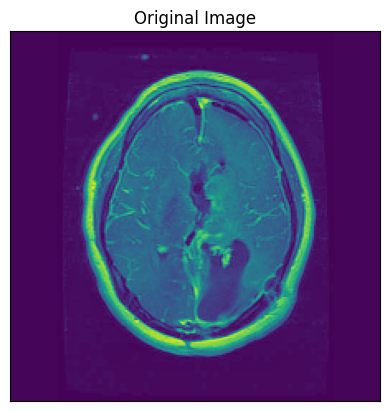

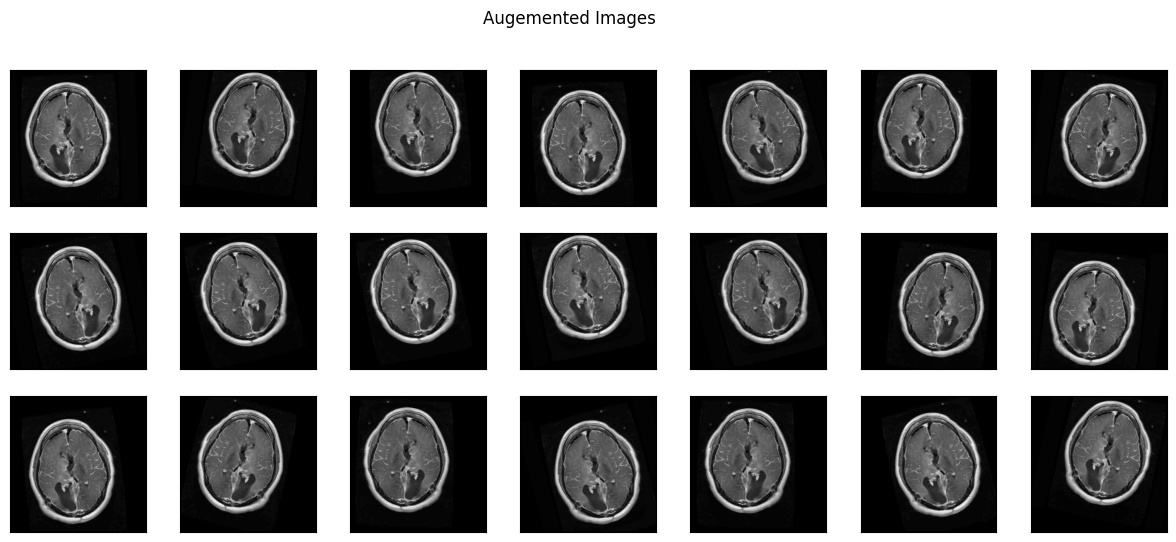

In [ ]:
#showing the orignal and augmented images
plt.imshow(x_train[0])
plt.xticks([])
plt.yticks([])
plt.title('Original Image')
plt.show()

plt.figure(figsize=(15,6))
i = 1
for img in os.listdir('preview/'):
    img = cv2.imread('preview/' + img)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    plt.subplot(3,7,i)
    plt.imshow(img)
    plt.xticks([])
    plt.yticks([])
    i += 1
    if i > 3*7:
        break
plt.suptitle('Augemented Images')
plt.show()

In [ ]:
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# VGG 16

In classification of our images we've applied the approach of Transfer Learning. We've imported the VGG16 model from Keras and assigned it ImageNet pre-trained weights.

In [ ]:
#imported VGG16 with ImageNet weights
VGG_model = VGG16(weights="imagenet", include_top=False, input_shape=(224, 224, 3))

for layer in VGG_model.layers:
  layer.trainable = False

m = GlobalAveragePooling2D()(VGG_model.output)
m = Dense(2048, activation="relu", kernel_regularizer=tf.keras.regularizers.l2(0.001))(m)
m = Dropout(0.6)(m)
m = Dense(1024, activation="relu", kernel_regularizer=tf.keras.regularizers.l2(0.001))(m)
output = Dense(1, activation="sigmoid")(m)

In [ ]:
model = Model(inputs=VGG_model.input, outputs=output)

In [ ]:
model.compile(optimizer=Adam(learning_rate=0.0001), loss='binary_crossentropy', metrics=['accuracy'])

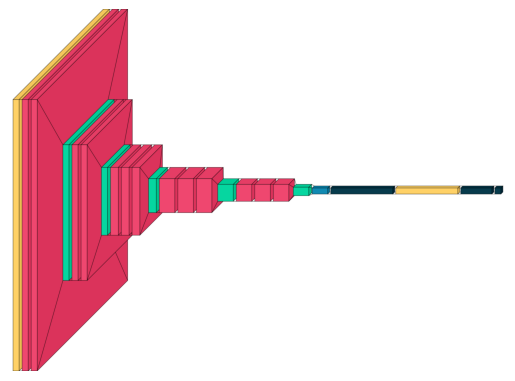

In [ ]:
model_show = visualkeras.layered_view(model)
plt.axis('off')
plt.imshow(model_show)

In [ ]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [ ]:
vgg_16_model = model.fit(train_generator, epochs=20, validation_data=val_generator, callbacks=[early_stopping])

Epoch 1/20
46/46 [==============================] - 27s 560ms/step - loss: 2.6625 - accuracy: 0.5789 - val_loss: 2.4121 - val_accuracy: 0.6481
Epoch 2/20
46/46 [==============================] - 26s 558ms/step - loss: 2.2256 - accuracy: 0.7160 - val_loss: 2.0829 - val_accuracy: 0.6481
Epoch 3/20
46/46 [==============================] - 25s 554ms/step - loss: 1.8941 - accuracy: 0.7764 - val_loss: 1.7335 - val_accuracy: 0.7778
Epoch 4/20
46/46 [==============================] - 26s 568ms/step - loss: 1.6421 - accuracy: 0.8086 - val_loss: 1.4910 - val_accuracy: 0.8580
Epoch 5/20
46/46 [==============================] - 26s 564ms/step - loss: 1.4683 - accuracy: 0.8210 - val_loss: 1.3707 - val_accuracy: 0.8086
Epoch 6/20
46/46 [==============================] - 27s 584ms/step - loss: 1.3115 - accuracy: 0.8477 - val_loss: 1.2960 - val_accuracy: 0.8210
Epoch 7/20
46/46 [==============================] - 27s 586ms/step - loss: 1.2109 - accuracy: 0.8539 - val_loss: 1.1361 - val_accuracy: 0.8519

In [ ]:
#predicting
vgg_predictions = model.predict(test_generator)

180/180 [==============================] - 3s 18ms/step


In [ ]:
test_labels = test_generator.classes

In [ ]:
vgg_pred_classes = np.round(vgg_predictions).astype("int32")
cf = classification_report(test_labels, vgg_pred_classes)
print(cf)

              precision    recall  f1-score   support

           0       0.86      0.94      0.90        82
           1       0.94      0.87      0.90        98

    accuracy                           0.90       180
   macro avg       0.90      0.90      0.90       180
weighted avg       0.90      0.90      0.90       180



In [ ]:
conf_matrix = confusion_matrix(test_labels, vgg_pred_classes)
print(conf_matrix)

[[77  5]
 [13 85]]


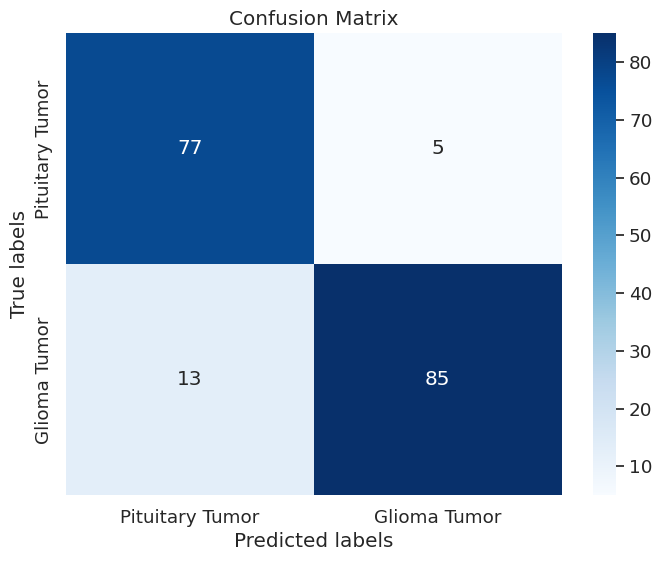

In [ ]:
class_names = ['Pituitary Tumor', 'Glioma Tumor']

# Plotting the confusion matrix
plt.figure(figsize=(8, 6))
sns.set(font_scale=1.2)  # Adjust font scale if needed
sns.heatmap(conf_matrix, annot=True, cmap="Blues", fmt="d",
            xticklabels=class_names, yticklabels=class_names)

plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

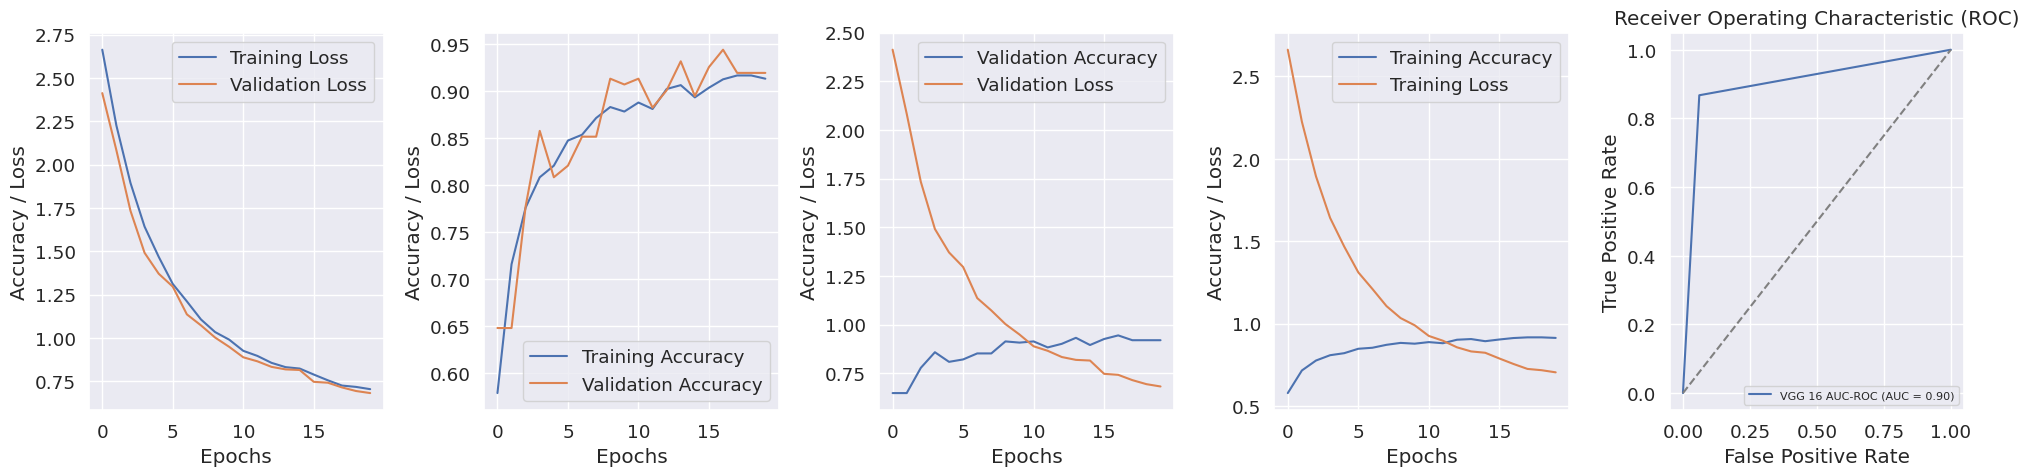

In [ ]:
plt.figure(figsize=(20, 5))
plt.subplot(1, 5, 1)
plt.plot(vgg_16_model.history['loss'], label='Training Loss')
plt.plot(vgg_16_model.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Accuracy / Loss')
plt.legend()

plt.subplot(1, 5, 2)
plt.plot(vgg_16_model.history['accuracy'], label='Training Accuracy')
plt.plot(vgg_16_model.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy / Loss')
plt.legend()

plt.subplot(1, 5, 3)
plt.plot(vgg_16_model.history['val_accuracy'], label='Validation Accuracy')
plt.plot(vgg_16_model.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Accuracy / Loss')
plt.legend()

plt.subplot(1, 5, 4)
plt.plot(vgg_16_model.history['accuracy'], label='Training Accuracy')
plt.plot(vgg_16_model.history['loss'], label='Training Loss')
plt.xlabel('Epochs')
plt.ylabel('Accuracy / Loss')
plt.legend()

# Calculate AUC-ROC
fpr, tpr, thresholds = roc_curve(test_labels, vgg_pred_classes)
roc_auc = roc_auc_score(test_labels, vgg_pred_classes)

# Plot AUC-ROC
plt.subplot(1, 5, 5)
plt.plot(fpr, tpr, label=f'VGG 16 AUC-ROC (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc='lower right', fontsize=8)

plt.tight_layout()
plt.show()

# EfficientNet

In [ ]:
from keras.src.layers.pooling.global_average_pooling2d import GlobalAveragePooling2D
eff_model = EfficientNetB0(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

eff_model.trainable = False

for layers in eff_model.layers:
  if "BatchNormalization" in layers.__class__.__name__:
    layers.trainable= True

m = GlobalAveragePooling2D()(eff_model.output)
m = Dense(2048, activation="relu", kernel_regularizer=tf.keras.regularizers.l2(0.001))(m)
m = Dropout(0.6)(m)
m = Dense(1024, activation="relu", kernel_regularizer=tf.keras.regularizers.l2(0.001))(m)
output = Dense(1, activation="sigmoid")(m)

e_model = Model(inputs=eff_model.input, outputs=output)

16705208/16705208 [==============================] - 1s 0us/step


In [ ]:
e_model.compile(optimizer=Adam(learning_rate=0.0001), loss='binary_crossentropy', metrics=['accuracy'])

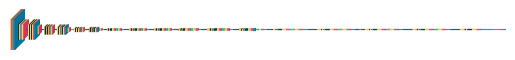

In [ ]:
e_model_show = visualkeras.layered_view(e_model)
plt.axis('off')
plt.imshow(e_model_show)

In [ ]:
e_model.summary()

Model: "model_2"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_2 (InputLayer)        [(None, 224, 224, 3)]        0         []                            
                                                                                                  
 rescaling (Rescaling)       (None, 224, 224, 3)          0         ['input_2[0][0]']             
                                                                                                  
 normalization (Normalizati  (None, 224, 224, 3)          7         ['rescaling[0][0]']           
 on)                                                                                              
                                                                                                  
 rescaling_1 (Rescaling)     (None, 224, 224, 3)          0         ['normalization[0][0]'] 

In [ ]:
e_model_train = e_model.fit(train_generator, epochs=20, validation_data=val_generator, callbacks=[early_stopping])

Epoch 1/20
46/46 [==============================] - 54s 683ms/step - loss: 3.3260 - accuracy: 0.8073 - val_loss: 3.4788 - val_accuracy: 0.5123
Epoch 2/20
46/46 [==============================] - 28s 599ms/step - loss: 2.9501 - accuracy: 0.9177 - val_loss: 3.3345 - val_accuracy: 0.4877
Epoch 3/20
46/46 [==============================] - 27s 594ms/step - loss: 2.7550 - accuracy: 0.9252 - val_loss: 3.3241 - val_accuracy: 0.4877
Epoch 4/20
46/46 [==============================] - 28s 602ms/step - loss: 2.6228 - accuracy: 0.9252 - val_loss: 3.1995 - val_accuracy: 0.4877
Epoch 5/20
46/46 [==============================] - 28s 599ms/step - loss: 2.4557 - accuracy: 0.9355 - val_loss: 3.8828 - val_accuracy: 0.4877
Epoch 6/20
46/46 [==============================] - 27s 594ms/step - loss: 2.3184 - accuracy: 0.9486 - val_loss: 4.3470 - val_accuracy: 0.4877
Epoch 7/20
46/46 [==============================] - 27s 588ms/step - loss: 2.2139 - accuracy: 0.9479 - val_loss: 4.3446 - val_accuracy: 0.4877

In [ ]:
#predicting
predictions = e_model.predict(test_generator)

180/180 [==============================] - 6s 20ms/step


In [ ]:
eff_pred_classes = np.round(predictions).astype("int32")
eff_cf = classification_report(test_labels, eff_pred_classes)
print(eff_cf)

              precision    recall  f1-score   support

           0       0.75      0.88      0.81        82
           1       0.88      0.76      0.81        98

    accuracy                           0.81       180
   macro avg       0.82      0.82      0.81       180
weighted avg       0.82      0.81      0.81       180



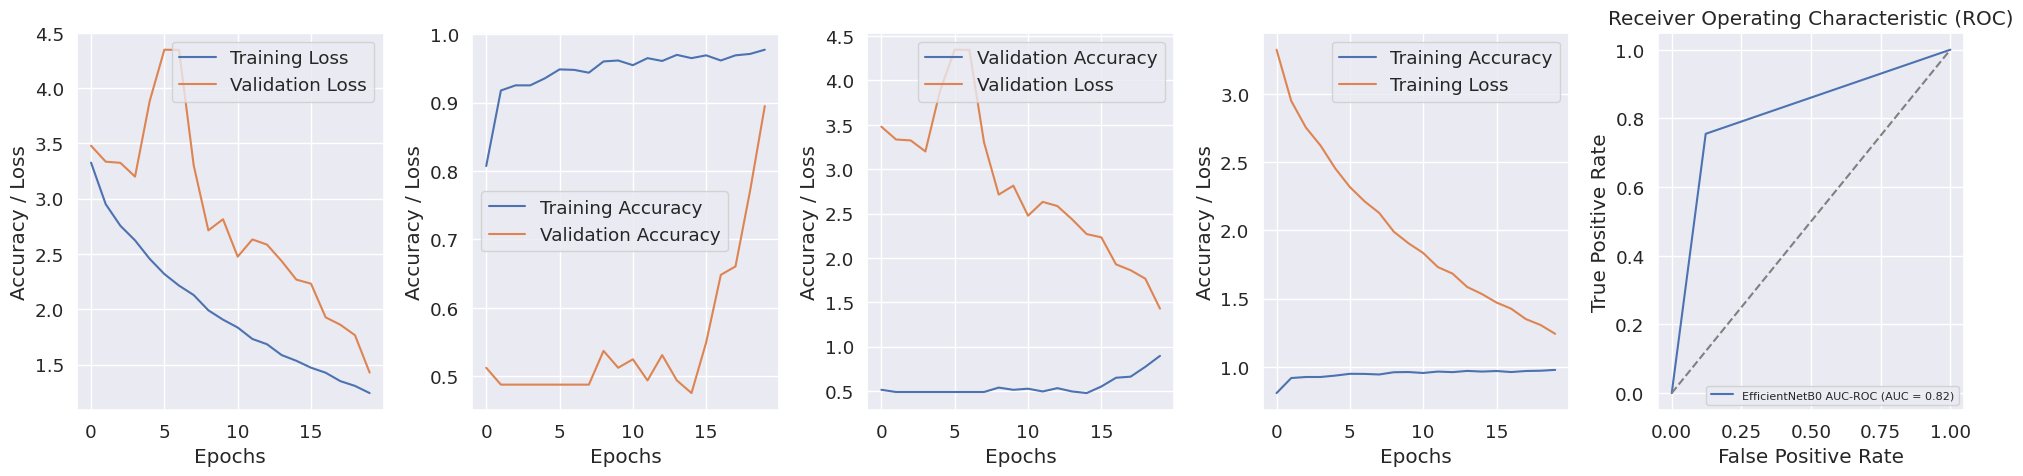

In [ ]:
plt.figure(figsize=(20, 5))
plt.subplot(1, 5, 1)
plt.plot(e_model_train.history['loss'], label='Training Loss')
plt.plot(e_model_train.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Accuracy / Loss')
plt.legend()

plt.subplot(1, 5, 2)
plt.plot(e_model_train.history['accuracy'], label='Training Accuracy')
plt.plot(e_model_train.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy / Loss')
plt.legend()

plt.subplot(1, 5, 3)
plt.plot(e_model_train.history['val_accuracy'], label='Validation Accuracy')
plt.plot(e_model_train.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Accuracy / Loss')
plt.legend()

plt.subplot(1, 5, 4)
plt.plot(e_model_train.history['accuracy'], label='Training Accuracy')
plt.plot(e_model_train.history['loss'], label='Training Loss')
plt.xlabel('Epochs')
plt.ylabel('Accuracy / Loss')
plt.legend()

# Calculate AUC-ROC
fpr, tpr, thresholds = roc_curve(test_labels, eff_pred_classes)
roc_auc = roc_auc_score(test_labels, eff_pred_classes)

# Plot AUC-ROC
plt.subplot(1, 5, 5)
plt.plot(fpr, tpr, label=f'EfficientNetB0 AUC-ROC (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc='lower right', fontsize=8)

plt.tight_layout()
plt.show()

In [ ]:
conf_matrix = confusion_matrix(test_labels, eff_pred_classes)
print(conf_matrix)

[[72 10]
 [24 74]]


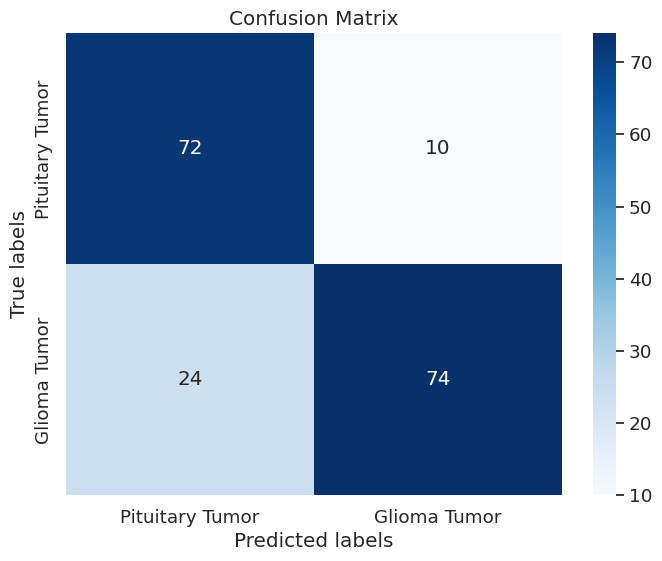

In [ ]:
class_names = ['Pituitary Tumor', 'Glioma Tumor']

# Plotting the confusion matrix
plt.figure(figsize=(8, 6))
sns.set(font_scale=1.2)  # Adjust font scale if needed
sns.heatmap(conf_matrix, annot=True, cmap="Blues", fmt="d",
            xticklabels=class_names, yticklabels=class_names)

plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

# InceptionV3-CBAM

In [ ]:
def cbam_block(cbam_feature, ratio=8):
	cbam_feature = channel_attention(cbam_feature, ratio)
	cbam_feature = spatial_attention(cbam_feature)
	return cbam_feature

In [ ]:
def channel_attention(input_feature, ratio=8):

	channel_axis = 1 if K.image_data_format() == "channels_first" else -1
	channel = input_feature.shape[channel_axis]

	shared_layer_one = Dense(channel//ratio,
							 activation='relu',
							 kernel_initializer='he_normal',
							 use_bias=True,
							 bias_initializer='zeros')
	shared_layer_two = Dense(channel,
							 kernel_initializer='he_normal',
							 use_bias=True,
							 bias_initializer='zeros')

	avg_pool = GlobalAveragePooling2D()(input_feature)
	avg_pool = Reshape((1,1,channel))(avg_pool)
	assert avg_pool.shape[1:] == (1,1,channel)
	avg_pool = shared_layer_one(avg_pool)
	assert avg_pool.shape[1:] == (1,1,channel//ratio)
	avg_pool = shared_layer_two(avg_pool)
	assert avg_pool.shape[1:] == (1,1,channel)

	max_pool = GlobalMaxPooling2D()(input_feature)
	max_pool = Reshape((1,1,channel))(max_pool)
	assert max_pool.shape[1:] == (1,1,channel)
	max_pool = shared_layer_one(max_pool)
	assert max_pool.shape[1:] == (1,1,channel//ratio)
	max_pool = shared_layer_two(max_pool)
	assert max_pool.shape[1:] == (1,1,channel)

	cbam_feature = Add()([avg_pool,max_pool])
	cbam_feature = Activation('sigmoid')(cbam_feature)

	if K.image_data_format() == "channels_first":
		cbam_feature = Permute((3, 1, 2))(cbam_feature)

	return multiply([input_feature, cbam_feature])

In [ ]:
def spatial_attention(input_feature):
	kernel_size = 7

	if K.image_data_format() == "channels_first":
		channel = input_feature.shape[1]
		cbam_feature = Permute((2,3,1))(input_feature)
	else:
		channel = input_feature.shape[-1]
		cbam_feature = input_feature

	avg_pool = Lambda(lambda x: K.mean(x, axis=3, keepdims=True))(cbam_feature)
	assert avg_pool.shape[-1] == 1
	max_pool = Lambda(lambda x: K.max(x, axis=3, keepdims=True))(cbam_feature)
	assert max_pool.shape[-1] == 1
	concat = Concatenate(axis=3)([avg_pool, max_pool])
	assert concat.shape[-1] == 2
	cbam_feature = Conv2D(filters = 1,
					kernel_size=kernel_size,
					strides=1,
					padding='same',
					activation='sigmoid',
					kernel_initializer='he_normal',
					use_bias=False)(concat)
	assert cbam_feature.shape[-1] == 1

	if K.image_data_format() == "channels_first":
		cbam_feature = Permute((3, 1, 2))(cbam_feature)

	return multiply([input_feature, cbam_feature])

In [ ]:
base_inception = InceptionV3(weights="imagenet", include_top=False, input_shape=(224, 224, 3))

dual_attention_output = cbam_block(base_inception.output)

# Combine both channel and spatial attentions
combined_attention = tf.keras.layers.Add()([dual_attention_output])
x = GlobalAveragePooling2D()(combined_attention)
x = Dense(2048, activation="relu", kernel_regularizer=tf.keras.regularizers.l2(0.001))(x)
x = Dropout(0.6)(x)
x = Dense(1024, activation="relu", kernel_regularizer=tf.keras.regularizers.l2(0.001))(x)
output = Dense(1, activation="sigmoid")(x)

for layers in base_inception.layers:
    layers.trainable= False

# Create the final model
inception = tf.keras.models.Model(inputs=base_inception.input, outputs=output)

87910968/87910968 [==============================] - 3s 0us/step


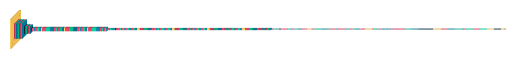

In [ ]:
inc_model_show = visualkeras.layered_view(inception)
plt.axis('off')
plt.imshow(inc_model_show)

In [ ]:
inception.summary()

Model: "model_3"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_3 (InputLayer)        [(None, 224, 224, 3)]        0         []                            
                                                                                                  
 conv2d (Conv2D)             (None, 111, 111, 32)         864       ['input_3[0][0]']             
                                                                                                  
 batch_normalization (Batch  (None, 111, 111, 32)         96        ['conv2d[0][0]']              
 Normalization)                                                                                   
                                                                                                  
 activation (Activation)     (None, 111, 111, 32)         0         ['batch_normalization[0]

In [ ]:
inception.compile(optimizer=Adam(learning_rate=0.0001), loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
inception_train = inception.fit(train_generator, epochs=20, validation_data=val_generator, callbacks=[early_stopping])

Epoch 1/20
46/46 [==============================] - 40s 639ms/step - loss: 3.6308 - accuracy: 0.8210 - val_loss: 3.3428 - val_accuracy: 0.9136
Epoch 2/20
46/46 [==============================] - 25s 541ms/step - loss: 3.1513 - accuracy: 0.9252 - val_loss: 2.9992 - val_accuracy: 0.9506
Epoch 3/20
46/46 [==============================] - 25s 544ms/step - loss: 2.8594 - accuracy: 0.9362 - val_loss: 2.7760 - val_accuracy: 0.9321
Epoch 4/20
46/46 [==============================] - 25s 541ms/step - loss: 2.6070 - accuracy: 0.9472 - val_loss: 2.5426 - val_accuracy: 0.9444
Epoch 5/20
46/46 [==============================] - 26s 565ms/step - loss: 2.3920 - accuracy: 0.9602 - val_loss: 2.3816 - val_accuracy: 0.9259
Epoch 6/20
46/46 [==============================] - 26s 576ms/step - loss: 2.2450 - accuracy: 0.9547 - val_loss: 2.1673 - val_accuracy: 0.9568
Epoch 7/20
46/46 [==============================] - 24s 520ms/step - loss: 2.0864 - accuracy: 0.9575 - val_loss: 2.0402 - val_accuracy: 0.9568

In [ ]:
#predicting
predictions = inception.predict(test_generator)

180/180 [==============================] - 4s 23ms/step


In [ ]:
inc_pred_classes = np.round(predictions).astype("int32")
inc_cf = classification_report(test_labels, inc_pred_classes)
print(inc_cf)

              precision    recall  f1-score   support

           0       0.96      0.98      0.97        82
           1       0.98      0.97      0.97        98

    accuracy                           0.97       180
   macro avg       0.97      0.97      0.97       180
weighted avg       0.97      0.97      0.97       180



In [ ]:
conf_matrix = confusion_matrix(test_labels, inc_pred_classes)
print(conf_matrix)

[[80  2]
 [ 3 95]]


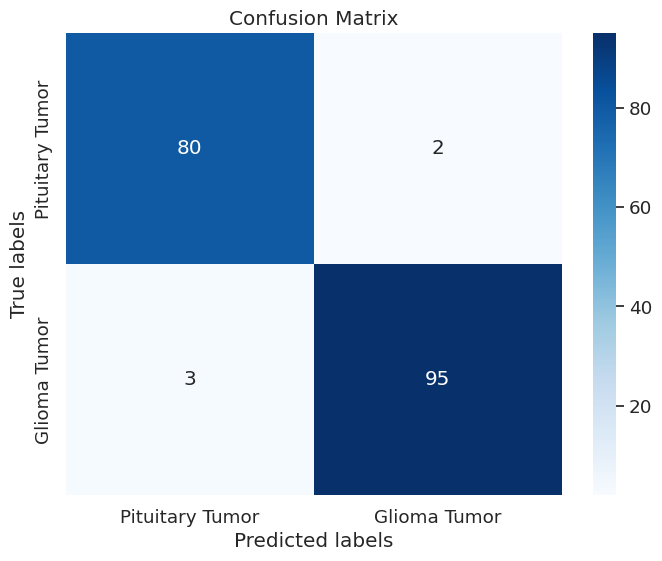

In [ ]:
class_names = ['Pituitary Tumor', 'Glioma Tumor']

# Plotting the confusion matrix
plt.figure(figsize=(8, 6))
sns.set(font_scale=1.2)  # Adjust font scale if needed
sns.heatmap(conf_matrix, annot=True, cmap="Blues", fmt="d",
            xticklabels=class_names, yticklabels=class_names)

plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

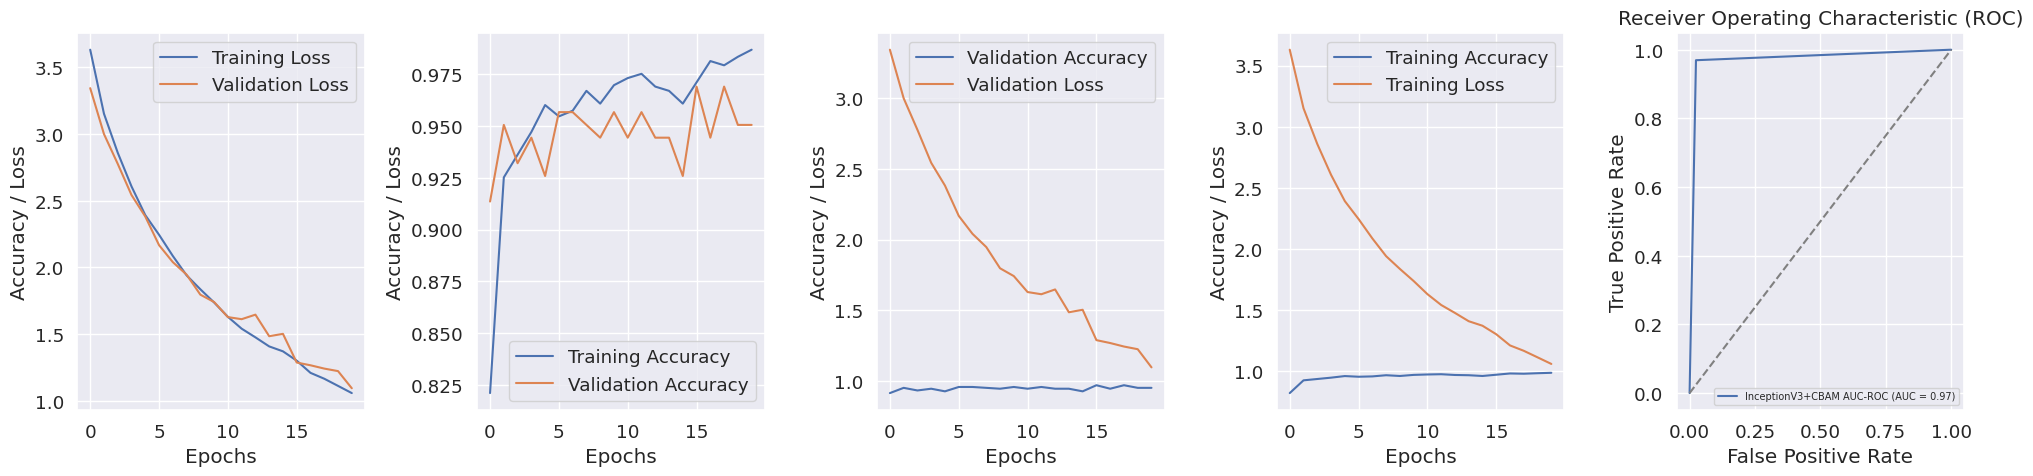

In [ ]:
plt.figure(figsize=(20, 5))
plt.subplot(1, 5, 1)
plt.plot(inception_train.history['loss'], label='Training Loss')
plt.plot(inception_train.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Accuracy / Loss')
plt.legend()

plt.subplot(1, 5, 2)
plt.plot(inception_train.history['accuracy'], label='Training Accuracy')
plt.plot(inception_train.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy / Loss')
plt.legend()

plt.subplot(1, 5, 3)
plt.plot(inception_train.history['val_accuracy'], label='Validation Accuracy')
plt.plot(inception_train.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Accuracy / Loss')
plt.legend()

plt.subplot(1, 5, 4)
plt.plot(inception_train.history['accuracy'], label='Training Accuracy')
plt.plot(inception_train.history['loss'], label='Training Loss')
plt.xlabel('Epochs')
plt.ylabel('Accuracy / Loss')
plt.legend()

# Calculate AUC-ROC
fpr, tpr, thresholds = roc_curve(test_labels, inc_pred_classes)
roc_auc = roc_auc_score(test_labels, inc_pred_classes)

# Plot AUC-ROC
plt.subplot(1, 5, 5)
plt.plot(fpr, tpr, label=f'InceptionV3+CBAM AUC-ROC (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc='lower right', fontsize=7)

plt.tight_layout()
plt.show()

# InceptionV3

In [ ]:
base_incv3 = InceptionV3(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

for layer in base_incv3.layers:
  layer.trainable = False

m = GlobalAveragePooling2D()(base_incv3.output)
m = Dense(2048, activation="relu", kernel_regularizer=tf.keras.regularizers.l2(0.001))(m)
m = Dropout(0.6)(m)
m = Dense(1024, activation="relu", kernel_regularizer=tf.keras.regularizers.l2(0.001))(m)
output = Dense(1, activation="sigmoid")(m)

incv3 = Model(inputs=base_incv3.input, outputs=output)

In [ ]:
incv3.summary()

Model: "model_5"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_4 (InputLayer)        [(None, 224, 224, 3)]        0         []                            
                                                                                                  
 conv2d_95 (Conv2D)          (None, 111, 111, 32)         864       ['input_4[0][0]']             
                                                                                                  
 batch_normalization_94 (Ba  (None, 111, 111, 32)         96        ['conv2d_95[0][0]']           
 tchNormalization)                                                                                
                                                                                                  
 activation_95 (Activation)  (None, 111, 111, 32)         0         ['batch_normalization_94

In [ ]:
incv3.compile(optimizer=Adam(learning_rate=0.0001), loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
incv3_train = incv3.fit(train_generator, epochs=20, validation_data=val_generator, callbacks=[early_stopping])

Epoch 1/20
46/46 [==============================] - 32s 567ms/step - loss: 3.6434 - accuracy: 0.8539 - val_loss: 3.4238 - val_accuracy: 0.9012
Epoch 2/20
46/46 [==============================] - 25s 546ms/step - loss: 3.3191 - accuracy: 0.9225 - val_loss: 3.1681 - val_accuracy: 0.9444
Epoch 3/20
46/46 [==============================] - 26s 576ms/step - loss: 3.0743 - accuracy: 0.9472 - val_loss: 2.9743 - val_accuracy: 0.9506
Epoch 4/20
46/46 [==============================] - 26s 556ms/step - loss: 2.8993 - accuracy: 0.9396 - val_loss: 2.7876 - val_accuracy: 0.9753
Epoch 5/20
46/46 [==============================] - 25s 547ms/step - loss: 2.7795 - accuracy: 0.9335 - val_loss: 2.6856 - val_accuracy: 0.9568
Epoch 6/20
46/46 [==============================] - 24s 525ms/step - loss: 2.6110 - accuracy: 0.9492 - val_loss: 2.6165 - val_accuracy: 0.9321
Epoch 7/20
46/46 [==============================] - 25s 529ms/step - loss: 2.4994 - accuracy: 0.9554 - val_loss: 2.4462 - val_accuracy: 0.9568

In [ ]:
#predicting
predictions = incv3.predict(test_generator)

180/180 [==============================] - 5s 29ms/step


In [ ]:
incv3_pred_classes = np.round(predictions).astype("int32")
incv3_cf = classification_report(test_labels, incv3_pred_classes)
print(incv3_cf)

              precision    recall  f1-score   support

           0       0.95      0.93      0.94        82
           1       0.94      0.96      0.95        98

    accuracy                           0.94       180
   macro avg       0.94      0.94      0.94       180
weighted avg       0.94      0.94      0.94       180



In [ ]:
conf_matrix = confusion_matrix(test_labels, incv3_pred_classes)
print(conf_matrix)

[[76  6]
 [ 4 94]]


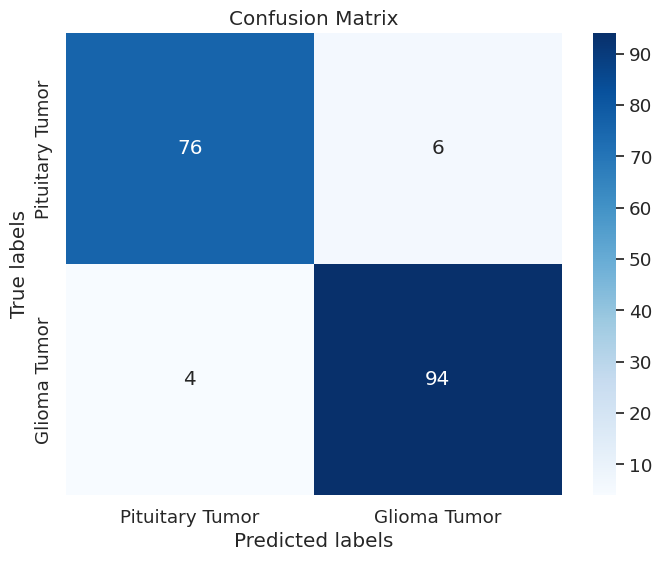

In [ ]:
class_names = ['Pituitary Tumor', 'Glioma Tumor']

# Plotting the confusion matrix
plt.figure(figsize=(8, 6))
sns.set(font_scale=1.2)  # Adjust font scale if needed
sns.heatmap(conf_matrix, annot=True, cmap="Blues", fmt="d",
            xticklabels=class_names, yticklabels=class_names)

plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

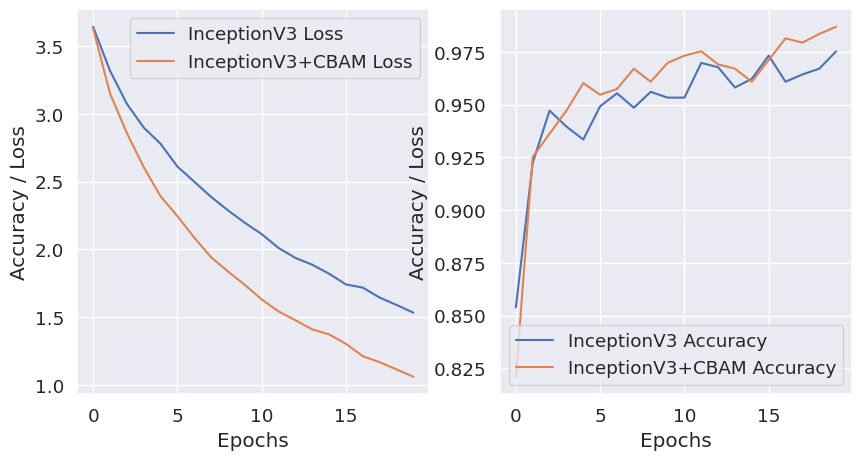

In [ ]:
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(incv3_train.history['loss'], label='InceptionV3 Loss')
plt.plot(inception_train.history['loss'], label='InceptionV3+CBAM Loss')
plt.xlabel('Epochs')
plt.ylabel('Accuracy / Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(incv3_train.history['accuracy'], label='InceptionV3 Accuracy')
plt.plot(inception_train.history['accuracy'], label='InceptionV3+CBAM Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy / Loss')
plt.legend()
